### Laboratory work 5: Fuzzy Numbers
The task of the lab is to develop the fuzzy operations:
* Division in the method __truediv__
* Summation in the method __add__

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [39]:
def mu_max(val,width,x):
    buff = ((x-val)/width)*((x-val)/width)
    return max(0,1-buff)  


class FuzzyValue():
    
    def __init__(self,val,width,mu = None):
        self.val = float(val)
        self.width = float(width)
        if mu is not None:
            self.mu = partial(mu,self.val,self.width)
        self.op = None
    

    def __call__(self,x):
        if self.mu is not None:
            return float(self.mu(x))


    def __truediv__(self, o):
        # Put your code here
        return max(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width), min(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width)
        #return FuzzyValue(self.val/o.val,self.width+o.width)

    def __add__(self, o): 
        # Put your code here
        self.op = o
        
        return self.val+o.val, self.width+o.width
    
    def draw(self):
        xs = np.linspace(-7,14,num=1000)
        y = [self(x) for x in xs]
        plt.figure()
        plt.plot(xs,y)        

a = FuzzyValue(5.1,1.5,mu_max)
b = FuzzyValue(4.3,2,mu_max)
# (a+b).draw()
#print(b(3))
#c=a+b
#d=



In [40]:
print(a+b)
print(a/b)

(9.399999999999999, 3.5)
(2.55, 0.3488372093023256)


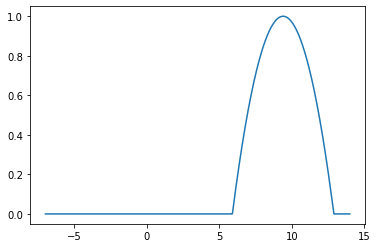

In [37]:
res_add = a+b
add_val = FuzzyValue(res_add[0],res_add[1],mu_max)
add_val.draw()

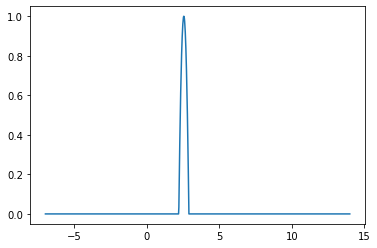

In [38]:
res_div = a/b
div_val = FuzzyValue(res_div[0],res_div[1],mu_max)
div_val.draw()